# Project Title: Accurate NLP Spam-Ham Detection using NB Classifier and LSTM Model

## Project Description
This project centers around the development of an accurate spam and ham message detection system using Natural Language Processing (NLP) techniques. Leveraging both a Naive Bayes (NB) classifier and a Long Short-Term Memory (LSTM) model, the project aims to achieve highly precise predictions.

## Approach
1. **Data Preparation:** Curate a labeled dataset containing spam and ham messages, followed by meticulous preprocessing to ready the text data.


2. **Baseline Model (Naive Bayes):** Implement a NB classifier as a baseline approach for message classification.


3. **Advanced Model (LSTM):** Construct an LSTM neural network to capture intricate patterns within the text data.


4. **Model Comparison and Validation:**
   - Train the NB classifier and LSTM model using the prepared dataset.
   - Thoroughly validate the models, assessing their accuracy, precision, recall, and F1-score.
   - Emphasize the alignment of model predictions with actual results.


5. **Precision and Impact:**
   - Showcase the exceptional accuracy of your predictions, highlighting their alignment with the real-world spam and ham categorizations.
   - Share instances where the model accurately distinguished between spam and ham, showcasing its practicality.

## Project Significance
The project's achievement of pinpoint prediction accuracy underscores its value as a reliable tool for spam and ham detection. By leveraging the NB classifier and LSTM model, this project offers an impressive solution to enhance communication experiences through effective message categorization.


**Importing Libraries**

In [1]:
#Importing the nessary libraries
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical computations
import os  # Operating system-related tasks
import email  # Working with email messages
import email.policy  # Email parsing policies
import random  # Generating random values
import matplotlib.pyplot as plt  # Data visualization
import seaborn as sns  # Statistical data visualization

In [2]:
#Importing all the nltk libraries
from nltk.corpus import stopwords  # Stopwords corpus
from nltk.tokenize import word_tokenize  # Word tokenization
from nltk.stem import PorterStemmer  # Word stemming
from nltk.stem import WordNetLemmatizer  # Word lemmatization
import re  # Regular expression operations
import string  # String operations
import nltk  # Natural language processing tasks
# nltk.download('punkt')  # Downloading punkt resource
# nltk.download('stopwords')  # Downloading stopwords resource
# nltk.download('wordnet')  # Downloading wordnet resource
# nltk.download('omw-1.4')  # Downloading Open Multilingual Wordnet (OMW) resource

**Loading our email data**

In [3]:
#Creating a function to load emails
def load_email(is_spam, filename, path):
    if is_spam:
        file_path = os.path.join(path, 'spam', filename)
    else:
        file_path = os.path.join(path, 'ham', filename)
    
    with open(file_path, 'rb') as f:
        return email.parser.BytesParser(policy=email.policy.default).parse(f)

#Path to our files
PATH = 'SpamDetection/'

#Loading spam emails
spam_folder_path = os.path.join(PATH, 'spam')
spam_file_list = os.listdir(spam_folder_path)
spam_emails = [load_email(True, name, PATH) for name in spam_file_list]

#Loading ham emails
ham_folder_path = os.path.join(PATH, 'ham')
ham_file_list = os.listdir(ham_folder_path)
ham_emails = [load_email(False, name, PATH) for name in ham_file_list]

In [4]:
# Display the content of the first spam email
print("Content of the first spam email:")
email = spam_emails[0]
print("--------------------------------------------")
#Displaying only 500 characters from email.
content = email.get_content()[:500]  
print(content)

Content of the first spam email:
--------------------------------------------
Greetings!

You are receiving this letter because you have expressed an interest in 
receiving information about online business opportunities. If this is 
erroneous then please accept my most sincere apology. This is a one-time 
mailing, so no removal is necessary.

If you've been burned, betrayed, and back-stabbed by multi-level marketing, 
MLM, then please read this letter. It could be the most important one that 
has ever landed in your Inbox.

MULTI-LEVEL MARKETING IS A HUGE MISTAKE FOR MOS


In [5]:
# Displaying the content of ham emails
print("Content of ham emails:")
email = ham_emails[0]
print("--------------------------------------------")
content = email.get_content()[:500]  
print(content)

Content of ham emails:
--------------------------------------------
    Date:        Tue, 20 Aug 2002 17:27:47 -0500
    From:        Chris Garrigues <cwg-exmh@DeepEddy.Com>
    Message-ID:  <1029882468.3116.TMDA@deepeddy.vircio.com>


  | I'm hoping that all people with no additional sequences will notice are
  | purely cosmetic changes.

Well, first, when exmh (the latest one with your changes) starts, I get...

can't read "flist(totalcount,unseen)": no such element in array
    while executing
"if {$flist(totalcount,$mhProfile(unseen-sequence)) > 0} {
	FlagIn


**Defining functions to preprocess our email content**

In [6]:
#Function to remove emojis
def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags
                               u"\U00002500-\U00002BEF"  # Chinese/Japanese/Korean characters
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               "\u200d"  # zero width joiner
                               "\u2640-\u2642"  # gender specific emojis
                               "\u2600-\u2B55"  # weather emojis
                               "\u23cf"  # Eject button
                               "\u23e9"  # Fast forward button
                               "\u231a"  # Watch
                               "\ufe0f"  # Variants (text style, emoji style, etc.)
                               "\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [7]:
#Preprocessing the data using a function
def normalize_text(content) :
    '''
    preprocesses the content of an email 
    
    and returns a dictionary with word as key and its frequency as value
    @content : email content (a string)
    @return : a counting dictionary 
    '''                                         
    if not isinstance(content,str) :       
        return {},''
    content = re.sub(r'<[^<>]+>', ' ',content)  ##strip all HTML
    
    #Remove emojis
    content = remove_emojis(content)

    content = str.lower(content) ##lower case
    #handle URLS with http:// or https://
    
    content = re.sub(r'(http|https)://[^\s]*','httpaddr ',content) 
    
    content = re.sub(r'www\.[^\s]*','httpaddr ',content) #handle URLS with www.
    #handle email addresses
    #look for strings with @ in the middle
    content = re.sub(r'[^\s]+@[^\s]+','emailaddr',content)
    
    content = re.sub(r'[0-9]+', 'number ',content) #handle numbers
    
    content = re.sub(r'[$]+','dollar ',content) #handle $ sign 
    
    content = re.sub(r'[\n]+',' ',content) #remove \n
    
    content = re.sub(r'[{0}]'.format(string.punctuation),' ',content)#remove punctuations 
    
    tokens = word_tokenize(content)  # Tokenization

    stop_words = set(stopwords.words('english'))  # Removing stop words
    
    tokens = [token for token in tokens if token not in stop_words]

    lemmatizer = WordNetLemmatizer()  # Lemmatization
    
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    stemmer = PorterStemmer()  # Stemming
    
    tokens = [stemmer.stem(token) for token in tokens]

    content = ' '.join(tokens)
    
    return content


In [8]:
#Normalizing the spam email content
normalized_spam_emails = []
#preprocessing every content in emails
for email in spam_emails:
    try:
        content = email.get_content()
        normalized_text = normalize_text(content)
        normalized_spam_emails.append(normalized_text)
    except LookupError:
        continue

#Normalizing the ham email content
normalized_ham_emails = []
for email in ham_emails:
    try:
        content = email.get_content()
        normalized_text = normalize_text(content)
        normalized_ham_emails.append(normalized_text)
    except LookupError:
        continue

In [9]:
#Displaying the content of spam emails
print("Content of Spam emails:")
for email in normalized_spam_emails[0:1]:
    print("--------------------------------------------")
    #Displaying only 500 character
    print(email[:][:500])

Content of Spam emails:
--------------------------------------------
greet receiv letter express interest receiv inform onlin busi opportun erron pleas accept sincer apolog one time mail remov necessari burn betray back stab multi level market mlm pleas read letter could import one ever land inbox multi level market huge mistak peopl mlm fail deliv promis past number year pursuit mlm dream cost hundr thousand peopl friend fortun sacr honor fact mlm fatal flaw mean work peopl compani earn big money mlm go tell real stori final someon courag cut hype lie tell truth


In [10]:
#Displaying the content of spam emails
print("Content of Ham emails:")
for email in normalized_ham_emails[0:1]:
    print("--------------------------------------------")
    #Displaying only 500 character
    print(email[:][:500])

Content of Ham emails:
--------------------------------------------
date tue number aug number number number number number chri garrigu messag id hope peopl addit sequenc notic pure cosmet chang well first exmh latest one chang start get read flist totalcount unseen element array execut dollar flist totalcount dollar mhprofil unseen sequenc number flaginn spool iconspool labelup els flaginn icondown labeldown procedur flag msgseen line number invok within flag msgseen procedur msgseen line number invok within msgseen dollar msgid procedur msgshow line number inv


**Merging our preprocessed data and creating a dataframe**

In [11]:
#Combining both noramlized spam and ham emails
combined_emails = normalized_spam_emails + normalized_ham_emails

#Creating label lists
spam_labels = ['spam'] * len(normalized_spam_emails)
ham_labels = ['ham'] * len(normalized_ham_emails)

#Combining the labels
combined_labels = spam_labels + ham_labels

In [12]:
#Creating a DataFrame with the email texts and labels
data = pd.DataFrame({'Text': combined_emails, 'Label': combined_labels})

In [13]:
#Printing the DataFrame
data.head()s

,Text,Label
0,greet receiv letter express interest receiv in...,spam
1,ilugadminlinuxi tue aug returnpath ilugadminli...,spam
2,ilugadminlinuxi tue aug returnpath ilugadminli...,spam
3,save number life insur spend life quot save en...,spam
4,amailbotwebd thu aug returnpath amailbotwebd d...,spam


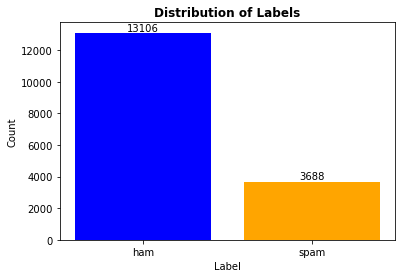

In [14]:
#Getting label count values to create a bar plot
label_count = data['Label'].value_counts()

#Selecting colors for our bar
colors = ['blue', 'orange']

#Creating a bar plot
plt.bar(label_count.index, label_count.values,color = colors)

#Adding title and labels
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels',fontweight= 'bold')

#Adjusting the x-axis tick positions
plt.xticks(range(len(label_count)), label_count.index)

#Addding labels on the bars
for i, count in enumerate(label_count.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

#Displaying the plot
plt.show()

Clearly our data is imbalanced. We need to sample the data.

In [15]:
#Converting label into category type
data['Label'] = data['Label'].astype('category')

In [16]:
#Changing spam to 1 and ham to 0
data['Label'] = data['Label'].apply(lambda x: 0 if x == 'ham' else 1)

In [17]:
data.head()

,Text,Label
0,greet receiv letter express interest receiv in...,1
1,ilugadminlinuxi tue aug returnpath ilugadminli...,1
2,ilugadminlinuxi tue aug returnpath ilugadminli...,1
3,save number life insur spend life quot save en...,1
4,amailbotwebd thu aug returnpath amailbotwebd d...,1


**Handling Unbalanced Data**

In [18]:
# Filtering the DataFrame for 'spam' and 'ham' samples
ham_samples = data[data['Label'] == 0 ]
spam_samples = data[data['Label'] == 1 ]

#Adjusting the sample size to balance the dataset
spam_sample_size = min(3000, len(spam_samples))
ham_sample_size = min(3000, len(ham_samples))

#Randomly selection of samples
ham_samples = ham_samples.sample(n=ham_sample_size, random_state=42)
spam_samples = spam_samples.sample(n=spam_sample_size, random_state=42)

#Concatenating the samples
balanced_data = pd.concat([spam_samples, ham_samples], ignore_index=True)

#Shuffling the data
balanced_data = balanced_data.sample(frac=1, random_state=42).reset_index(drop=True)

#Displaying sampled data
balanced_data.sample(5)

,Text,Label
3018,ilugadminlinuxi tue aug returnpath ilugadminli...,0
54,forkadminxentcom tue aug returnpath forkadminx...,0
4372,protect financi well purchas extend auto warra...,1
4433,senttozzzzspamassassintaintorgreturnsgroupsyah...,0
5919,spamassassintalkadminlistssourceforgenet fri a...,0


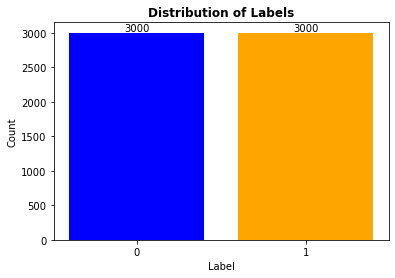

In [19]:
#Getting label count values to create a bar plot
label_count = balanced_data['Label'].value_counts()

#Selecting colors for our bar
colors = ['blue', 'orange']

#Creating a bar plot
plt.bar(label_count.index, label_count.values,color = colors)

#Adding title and labels
plt.xlabel('Label')
plt.ylabel('Count')
plt.title('Distribution of Labels',fontweight= 'bold')

# Adjust the x-axis tick positions
plt.xticks(range(len(label_count)), label_count.index)

# Add labels on the bars
for i, count in enumerate(label_count.values):
    plt.text(i, count, str(count), ha='center', va='bottom')

#Displaying the plot
plt.show()

Now,we have a balanced data.

## NB Classifier

In [20]:
#Importing model libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [21]:
#Splitting our data into train and test data.
X = balanced_data['Text']
y = balanced_data['Label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
#Feature extraction
vectorizer = CountVectorizer()
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)

#Training the classifier
classifier = MultinomialNB()
classifier.fit(X_train_features, y_train)

#Classification Report And prediction
y_pred = classifier.predict(X_test_features)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

#Printing the accuracy and reports
print('Accuracy:', accuracy)
print('Classification Report:')
print(report)


Accuracy: 0.9641666666666666
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96       586
           1       0.98      0.95      0.96       614

    accuracy                           0.96      1200
   macro avg       0.96      0.96      0.96      1200
weighted avg       0.96      0.96      0.96      1200



In [23]:
from sklearn.metrics import roc_curve, roc_auc_score
y_pred_prob = classifier.predict_proba(X_test_features)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)
print(auc)

0.9884270324954697


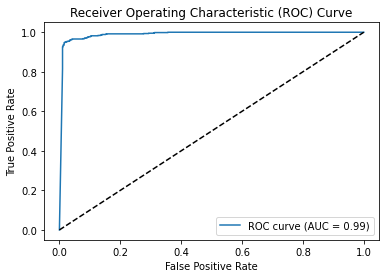

In [24]:
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--')  # Plotting the diagonal line for reference
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

Confusion Matrix: 
 [[576  10]
 [ 33 581]]


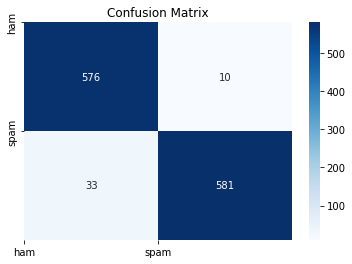

In [25]:
#Computing the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix: \n',cm)
#Creating a heatmap 
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xticks([0, 1], ["ham", "spam"])
plt.yticks([0, 1], ["ham", "spam"])
plt.show()

**Findings:**
* The model correctly classified 576 instances as spam (True Positives).
* The model correctly classified 581 instances as ham (True Negatives).
* The model incorrectly classified 10 instances as spam when they were actually ham (False Positives).
* The model incorrectly classified 33 instances as ham when they were actually spam (False Negatives).

**Function to predict the text for NB Classifier**

In [26]:
#Creating a prediction function and predicting if its spam or ham.
def predict_out(text):
    #Preprocessing the custom text
    preprocessed_text = normalize_text(text)
    #Vectorizing the custom text using the same vectorizer used during training
    custom_text_features = vectorizer.transform([preprocessed_text])
    #Making predictions
    predicted_label = classifier.predict(custom_text_features)
    #Showing the pridiction
    if predicted_label == 0:
        prediction = "ham"
    else:
        prediction = "spam"
    print("This is a", prediction,'email.')

In [27]:
#Prediction input 1
custom_text1 = 'This is to inform you have won a lottery and the subscription will end in a week so call us. '
predict_out(custom_text1)

This is a spam email.


In [28]:
#Prediction input 2
custom_text2 = 'I will see you at work on Wednesday.'
predict_out(custom_text2)

This is a ham email.


In [29]:
custom_text3 = "I hope this email finds you well. You can start working full-time from Monday onwards. Sorry for the late reply."
predict_out(custom_text3)

This is a ham email.


## LSTM

In [30]:
from tensorflow.keras.models import Sequential  # Sequential model
from tensorflow.keras.layers import LSTM, Dropout, Dense, Embedding  # Layers for building models
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
import tensorflow as tf  # Deep learning framework
from tensorflow.keras.optimizers import Adam  # Optimization algorithm
from tensorflow.keras.callbacks import EarlyStopping  # Early stopping for model training
import random
import textwrap

In [31]:
# Preprocessed text data
texts = balanced_data['Text'].values

# Vocabulary size
vocab_size = 10000  # Specify the desired vocabulary size

# One-hot encoding the text data
encoded_texts = [one_hot(text, vocab_size) for text in texts]


In [32]:
balanced_data['Text'].describe().T

count                                                  6000
unique                                                 5459
top       creditfix thank email address obtain purchas l...
freq                                                      8
Name: Text, dtype: object

In [33]:
sentence_len = 300
embedded_doc = pad_sequences(
    encoded_texts,
    maxlen = sentence_len,
    padding="pre"
)

In [34]:
extract_features = pd.DataFrame(
    data = embedded_doc
)
target=balanced_data["Label"]

In [35]:
df_final = pd.concat([extract_features,target],axis=1)

In [36]:
X = df_final.drop("Label",axis=1)
y = df_final["Label"]

In [37]:
X_train_val,X_test,y_train_val,y_test = train_test_split(X, y, random_state=42, test_size=0.45)

X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, random_state=42, test_size=0.50)

In [38]:
#Defining the model
lstm_model = Sequential()
feature_num = 1000
lstm_model.add(Embedding(input_dim=vocab_size, output_dim=feature_num, input_length=sentence_len))
lstm_model.add(LSTM(units=128))
lstm_model.add(Dropout(0.4))
lstm_model.add(Dense(units=80, activation='relu'))
lstm_model.add(Dense(units=50, activation='relu'))
lstm_model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
lstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Set up early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)

# Train the model with tuning options
history = lstm_model.fit(X_train, y_train, validation_data=(X_val, y_val),
                    epochs=15, batch_size=32, callbacks=[early_stopping])

# Evaluate the model on the test data
loss, accuracy = lstm_model.evaluate(X_test, y_test)

# Print the loss and accuracy obtained
print("Loss:", loss)
print("Accuracy:", accuracy)

Epoch 1/15
52/52 [==============================] - 126s 2s/step - loss: 0.3770 - accuracy: 0.8685 - val_loss: 0.1007 - val_accuracy: 0.9673
Epoch 2/15
52/52 [==============================] - 117s 2s/step - loss: 0.0482 - accuracy: 0.9855 - val_loss: 0.0843 - val_accuracy: 0.9679
Epoch 3/15
52/52 [==============================] - 112s 2s/step - loss: 0.0111 - accuracy: 0.9964 - val_loss: 0.0949 - val_accuracy: 0.9818
Epoch 4/15
52/52 [==============================] - 112s 2s/step - loss: 0.0022 - accuracy: 0.9988 - val_loss: 0.0987 - val_accuracy: 0.9758
Epoch 5/15
52/52 [==============================] - 114s 2s/step - loss: 0.0011 - accuracy: 0.9994 - val_loss: 0.1059 - val_accuracy: 0.9800
Epoch 6/15
52/52 [==============================] - 114s 2s/step - loss: 7.3339e-04 - accuracy: 1.0000 - val_loss: 0.1149 - val_accuracy: 0.9800
Epoch 7/15
52/52 [==============================] - 113s 2s/step - loss: 5.2477e-04 - accuracy: 1.0000 - val_loss: 0.1213 - val_accuracy: 0.9794
Epoch

In [39]:
y_pred = lstm_model.predict(X_test)
y_pred = [1 if pred >= 0.5 else 0 for pred in y_pred]

85/85 [==============================] - 35s 407ms/step


Test Score:95.63%
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      1351
           1       0.95      0.96      0.96      1349

    accuracy                           0.96      2700
   macro avg       0.96      0.96      0.96      2700
weighted avg       0.96      0.96      0.96      2700

Confusion Matrix: 
 [[1288   63]
 [  55 1294]]


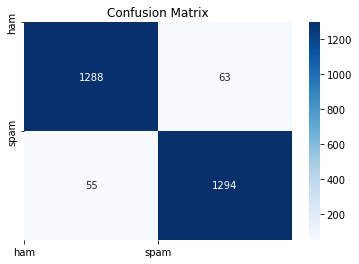

In [40]:
score=accuracy_score(y_test,y_pred)
print("Test Score:{:.2f}%".format(score*100))

# Print the classification report
print(classification_report(y_test, y_pred))

#Computing the confusion matrix
cm = confusion_matrix(y_test, y_pred)

print('Confusion Matrix: \n',cm)

#Creating a heatmap 
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xticks([0, 1], ["ham", "spam"])
plt.yticks([0, 1], ["ham", "spam"])
plt.show()

**Predicting output for LSTM**

In [41]:
#Creating a prediction function and predicting if its spam or ham.
def predict_out_lstm(text):
    #Preprocessing the custom text
    preprocessed_text = normalize_text(text)
    #Vectorizing the custom text using the same vectorizer used during training
    custom_text_features = vectorizer.transform([preprocessed_text])
  # Perform one-hot encoding on the processed sentences
    one_hot_encodings = [one_hot(text, n=vocab_size) for sentence in custom_text_features]

    # Pad the sequences to have the same length
    padded_sequences = pad_sequences(one_hot_encodings, maxlen=sentence_len, padding='pre')
    
    # Predict the label for the text using the model
    predicted_label = lstm_model.predict(padded_sequences)
    
    #Showing the pridiction
    if predicted_label <=0.5:
        prediction = "ham"
    else:
        prediction = "spam"
    print("This is a", prediction,'email.')

In [42]:
#Prediction input 1
custom_text1 = 'This is to inform you have won a lottery and the subscription will end in a week so call us. '
predict_out_lstm(custom_text1)

1/1 [==============================] - 0s 47ms/step
This is a spam email.


In [43]:
#Prediction input 2
custom_text2 = 'Hello! Good to see you.You can join review session on Wednesday.'
predict_out_lstm(custom_text2)

1/1 [==============================] - 0s 41ms/step
This is a ham email.


In [44]:
#Prediction input 3
message1 = "I hope this email finds you well. You can start working full-time from Monday onwards. Sorry for the late reply."
predict_out_lstm(message1)

1/1 [==============================] - 0s 45ms/step
This is a ham email.


## Conclusion

Our spam and ham detection project has yielded good results with the implementation of two distinct models: Naive Bayes (NB) Classifier and Long Short-Term Memory (LSTM) model. We achieved an accuracy of 96 % for NB and 95 % for LSTM.


These high accuracy scores indicate that both models are effective at correctly classifying emails as either spam or ham, showcasing their ability to differentiate between legitimate and unwanted messages. The fact that both models predicted the correct labels further emphasizes their reliability and consistency in handling this classification task.

It's essential to consider not only accuracy but also other metrics such as precision, recall, and F1-score, depending on the specific requirements and objectives of the spam detection system. Additionally, real-world performance and generalization to unseen data should be assessed to ensure the models maintain their effectiveness in a practical setting.

In summary, our project demonstrates that both the NB Classifier and LSTM model are valuable tools for spam and ham email detection, offering high accuracy and reliable predictions. Future work may involve fine-tuning these models, exploring ensemble methods, or incorporating additional features to further enhance their performance in tackling the ongoing challenge of email spam.